In [6]:

# This is closely following the tensorflow tutorial: https://www.tensorflow.org/tutorials/keras/classification
# and https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l03c01_classifying_images_of_clothing.ipynb#scrollTo=IjnLH5S2CaWx
# which are both similar but different in some significant ways. 
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt




In [ ]:

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
print(train_images.shape)
print(len(train_labels))
print(test_images.shape)
len(test_labels)
print(train_labels[0:20])

(60000, 28, 28)
60000
(10000, 28, 28)
[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9 1 0 6 4]


60 000 images each 28 by 28 pixels in size and with a label. 10 000 test images with labels.

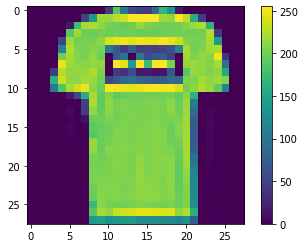

In [ ]:

plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# Normalise the dataset (does this matter if all descriptors in the same range? and relus used so no gradient saturation. But not using normalization - second example below ruins the accuracy of the model, reduction it from approx 0.8 to approx 0.1!
train_images = train_images / 255.0
test_images = test_images / 255.0

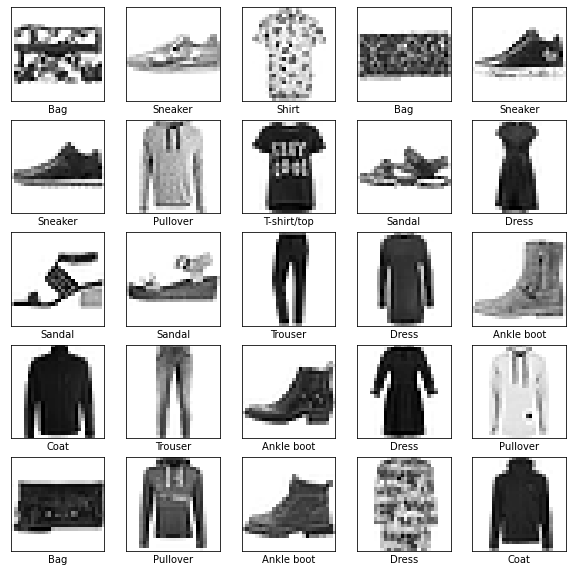

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10))
for i in range(10000,10025):  # pick a sample of images to check they have been preprocessed properly
    plt.subplot(5,5,i-9999)   # i-999 is specifying position. 
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

# the labels to be predicted are 0 to 9, i.e. a number not a one hot encoding. For one hot encoding one uses the
# categorical cross entropy function, but with this sparse encoding the sparse categorical cross entropy should be
# used.  One version of this tutorial 
# available through the tensorflow website, has softmax with SparseCategoricalCrossEntropy, the other has
# a linear 10 node dense layer without activation function, as here. For the latter, which uses the raw "logits" (although
# not from sigmoid function) and thus uses the flag: SparseCategoricalCrossentropy(from_logits=True). The 
# default setting is to assume that the outputs have not been through a softmax. In anycase, it doesn't make much sense to use 
# a dense layer for such a classification, since it has no equivariant or invariant properties. Better to use a CNN which has some  
#  translational equivariance.   
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\n Test accuracy:', test_acc) 

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4995 - accuracy: 0.8243
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3711 - accuracy: 0.8661
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3352 - accuracy: 0.8777
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3099 - accuracy: 0.8863
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2933 - accuracy: 0.8916
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2779 - accuracy: 0.8972
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2651 - accuracy: 0.9014
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2540 - accuracy: 0.9054
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2467 - accuracy: 0.9078
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.235

In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]

array([4.8888339e-08, 1.3444235e-11, 4.8852096e-11, 1.2933634e-11,
       2.5936164e-10, 1.4042163e-03, 5.3611469e-08, 4.0302379e-03,
       3.3227459e-09, 9.9456549e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
# try without normalisation - i.e. multiply by 255 again, to remove the division by 255 that we did earlier
train_images = train_images * 255.0
test_images = test_images * 255.0


In [ ]:
# model2 trainging with unnormalised data
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model2.fit(train_images, train_labels, epochs=10)
test_loss, test_acc = model2.evaluate(test_images,  test_labels, verbose=2)

print('\n Test accuracy:', test_acc) 

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 691.4177 - accuracy: 0.3814
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 3.7831 - accuracy: 0.2153
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.4563 - accuracy: 0.1939
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.6037 - accuracy: 0.1399
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.6436 - accuracy: 0.1258
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3841 - accuracy: 0.1178
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3160 - accuracy: 0.1155
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3165 - accuracy: 0.1133
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2539 - accuracy: 0.1204
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2

In [4]:
# The next few sections are using the map function to renormalize and then shuffle the training and test sets. This gives a marginally 
# lower accuracy, as seen below, for the training and for the test sets although the difference between the two sets is slightly less than 
# without shuffling, 
# suggesting that the shuffling may remove some overfitting. Although this could be due to the stochastic nature of these things. 
import tensorflow_datasets as tfds
tfds.disable_progress_bar()
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples


In [7]:
# Using the map function to renormalize

def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)



In [8]:
# let's shuffle the dataset on each iteration. The tutorial doesn't have the reshuffle_each_iteration=True flag, but without that guide says it will only 
# shuffle the data once. And then retrain model2

BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples, reshuffle_each_iteration=True).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28,1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [9]:
import math 
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 18s 4ms/step - loss: 0.4939 - accuracy: 0.8277
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3723 - accuracy: 0.8657
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3364 - accuracy: 0.8776
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3169 - accuracy: 0.8842
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2883 - accuracy: 0.8940


In [10]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 4s 10ms/step - loss: 0.3501 - accuracy: 0.8790
Accuracy on test dataset: 0.8790000081062317


In [11]:
# Try now with a CNN.  Data should still be shuffled, from previous. 

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])





In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
              metrics=['accuracy'])  # using softmax - logits False

model.fit(train_dataset, epochs=10, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

test_loss, test_acc = model.evaluate(test_dataset, verbose=2)

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0222 - accuracy: 0.9921
Epoch 2/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0224 - accuracy: 0.9918
Epoch 3/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0207 - accuracy: 0.9927
Epoch 4/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0209 - accuracy: 0.9927
Epoch 5/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0181 - accuracy: 0.9941
Epoch 6/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0161 - accuracy: 0.9944
Epoch 7/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0199 - accuracy: 0.9928
Epoch 8/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0169 - accuracy: 0.9945
Epoch 9/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0187 - accuracy: 0.9934
Epoch 10/10
1875/1875 [==============================] - 13s 7ms/step - l

In [17]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

print(predictions.shape)
print(np.argmax(predictions[0]))
print(test_labels[0])



(32, 10)
4
4
